<a href="https://colab.research.google.com/github/Debashruti-Guha/Mini-Project/blob/main/Minor_Project_Debashruti_Guha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.96 ms (started: 2021-06-19 08:41:46 +00:00)


In [2]:
#Step 1 : Gathering Data
!pip install bing-image-downloader

time: 3.03 s (started: 2021-06-19 08:41:57 +00:00)


In [3]:
!mkdir images

time: 113 ms (started: 2021-06-19 08:42:40 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("oranges",limit=50,output_dir='images')

[%] Downloading Images to /content/images/oranges


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.quirkyscience.com/wp-content/uploads/2015/11/Oranges-by-Morguefile.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.healthline.com/hlcmsresource/images/AN_images/benefits-of-oranges-1200x628-facebook.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.dominicancooking.com/wp-content/uploads/naranja-china-orange-DSC4146.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Ambersweet_oranges.jpg/1200px-Ambersweet_oranges.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://miakouppa.com/wp-content/uploads/2017/02/img_3938.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/d4/4b/d9/d44bd99516b8557ee5551818d9694765.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn.apartmentther

In [5]:
from bing_image_downloader import downloader
downloader.download("shoes",limit=50,output_dir='images')

[%] Downloading Images to /content/images/shoes


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://www.ems.com/dw/image/v2/AAQU_PRD/on/demandware.static/-/Sites-vestis-master-catalog/default/dwdd1103c3/product/images/2021/743/2021743/2021743_004_main.jpg?sw=474&amp;sh=474&amp;sm=fit
[%] File Downloaded !

[%] Downloading Image #2 from http://thesandtrap.com/b/imgs/apparel/true_linkswear_review_photos_front.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.intheholegolf.com/img/true-linkswear-golf-shoes/true-linkswear-true-vegas-golf-shoes-brown-orange-2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://buffaloridgegolfcourse.com/wp-content/uploads/2018/08/true-linkswear-knit-golf-shoe-review.jpg
[!] Issue getting: https://buffaloridgegolfcourse.com/wp-content/uploads/2018/08/true-linkswear-knit-golf-shoe-review.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self si

In [6]:
from bing_image_downloader import downloader
downloader.download("cycles",limit=50,output_dir='images')

[%] Downloading Images to /content/images/cycles


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.redkitecycles.co.uk/wp-content/uploads/2019/09/IMG_1515-1500x1125.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://truenorthcycles.com/wp-content/uploads/2017/01/Franks-road-bike.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.truenorthcycles.com/wp-content/gallery/hugh-blog-updates/heathers-road-bike.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.truenorthcycles.com/wp-content/gallery/blog-update-1/dsc_0056.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/89/0f/34/890f3445581b251f717b899815482af5.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://live.staticflickr.com/65535/48288087856_b310c12bbf_b.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://2.bp.blogspot.com/_eGu_eT2OhWA/SwMCTKoUWYI/AAAAAAAACWc/W-hN6HOQjGc

In [7]:
#Step 2 : Preprocessing (Resize & Flatten)
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['oranges', 'shoes', 'cycles']

for category in CATEGORIES:
  print(category)

oranges
shoes
cycles
time: 975 ms (started: 2021-06-19 08:44:18 +00:00)


In [8]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 1min 4s (started: 2021-06-19 08:44:27 +00:00)


<BarContainer object of 3 artists>

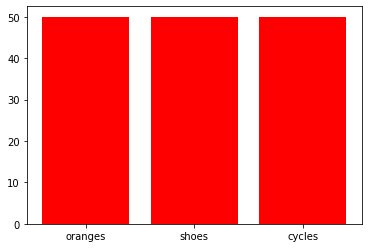

time: 139 ms (started: 2021-06-19 08:46:02 +00:00)


In [11]:
unique,count = np.unique(target,return_counts='True')
plt.bar(CATEGORIES,count, color = 'r')

In [17]:
#Step 3 : Hyperparameter Tuning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.4,random_state=40)

time: 30 ms (started: 2021-06-19 08:51:19 +00:00)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 55s (started: 2021-06-19 08:51:21 +00:00)


In [19]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2])

time: 564 ms (started: 2021-06-19 08:57:21 +00:00)


In [20]:
y_test

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2])

time: 8.48 ms (started: 2021-06-19 08:57:26 +00:00)


In [21]:
#Step 4 : Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred,y_test)

0.9166666666666666

time: 6.33 ms (started: 2021-06-19 08:57:30 +00:00)


In [22]:
confusion_matrix(y_pred,y_test)

array([[17,  0,  0],
       [ 2, 18,  0],
       [ 1,  2, 20]])

time: 15.2 ms (started: 2021-06-19 08:57:36 +00:00)


In [23]:
#Saving the Model
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 96.6 ms (started: 2021-06-19 08:57:40 +00:00)


In [24]:
model = pickle.load(open('img_model.p','rb'))

time: 30.6 ms (started: 2021-06-19 08:57:46 +00:00)


Enter the URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvpLAzz8sBlXPHWnPknvsDfWp2Ncx-7nbtyA&usqp=CAU.jpg
(186, 271, 3)
 PREDICTED OUTPUT : oranges


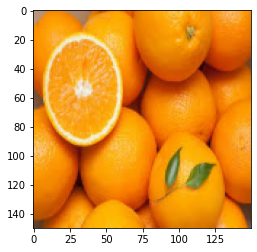

time: 14 s (started: 2021-06-19 08:57:51 +00:00)


In [25]:
#Step 6 : Predicting with a New Image
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')
#Image link for testing
#Oranges : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvpLAzz8sBlXPHWnPknvsDfWp2Ncx-7nbtyA&usqp=CAU.jpg

Enter the URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRciiBFQ4T9nczN0jxXR26vihI-EqBKspN3fA&usqp=CAU.jpg
(224, 224, 3)
 PREDICTED OUTPUT : shoes


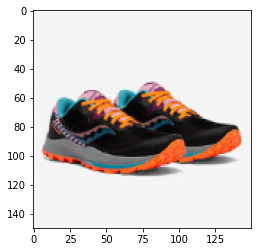

time: 3.86 s (started: 2021-06-19 08:58:21 +00:00)


In [26]:
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')
#Image link for testing
#Shoes : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRciiBFQ4T9nczN0jxXR26vihI-EqBKspN3fA&usqp=CAU.jpg

Enter the URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRc9seSAQGcMY46bwzpEnHND5GybPdf4n57lg&usqp=CAU.jpg
(176, 286, 3)
 PREDICTED OUTPUT : cycles


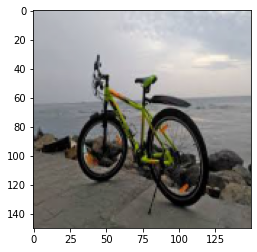

time: 3.65 s (started: 2021-06-19 08:58:36 +00:00)


In [27]:
flat_data = []
url = input('Enter the URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')
#Image link for testing
#Cycles : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRc9seSAQGcMY46bwzpEnHND5GybPdf4n57lg&usqp=CAU.jpg